# Importing and installing libraries

In [73]:
import pandas as pd                                                 # Importing for panel data analysis
#from pandas_profiling import ProfileReport                          # Import Pandas Profiling (To generate Univariate Analysis) 
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high      
pd.set_option('display.max_colwidth', None)                         # Unfolding the max feature width for better clearity      
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
pd.set_option('display.float_format', lambda x: '%.5f' % x)         # To suppress scientific notation over exponential values
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface using matplotlib
from matplotlib.pylab import rcParams                               # Backend used for rendering and GUI integration                                               
import seaborn as sns                                               # Importin seaborm library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.metrics import accuracy_score                          # For calculating the accuracy for the model
from sklearn.metrics import precision_score                         # For calculating the Precision of the model
from sklearn.metrics import recall_score                            # For calculating the recall of the model
from sklearn.metrics import precision_recall_curve                  # For precision and recall metric estimation
from sklearn.metrics import confusion_matrix                        # For verifying model performance using confusion matrix
from sklearn.metrics import f1_score                                # For Checking the F1-Score of our model  
from sklearn.metrics import roc_curve                               # For Roc-Auc metric estimation
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split                # To split the data in training and testing part     
from sklearn.linear_model import LogisticRegression                 # To create the Logistic Regression Model
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once

# Data Acquisition

In [74]:
train = pd.read_csv("Churn_train.csv")
train.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5442-PPTJY,Male,0,Yes,Yes,12,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.70000,258.35,No
1,6261-RCVNS,Female,0,No,No,42,Yes,No,DSL,Yes,Yes,Yes,Yes,No,Yes,One year,No,Credit card (automatic),73.90000,3160.55,Yes
2,2176-OSJUV,Male,0,Yes,No,71,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,No,Bank transfer (automatic),65.15000,4681.75,No
3,6161-ERDGD,Male,0,Yes,Yes,71,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,85.45000,6300.85,No
4,2364-UFROM,Male,0,No,No,30,Yes,No,DSL,Yes,Yes,No,Yes,Yes,No,One year,No,Electronic check,70.40000,2044.75,No


In [75]:
train.shape

(5634, 21)

In [76]:
test = pd.read_csv("Churn_test.csv")
test.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,8879-ZKJOF,Female,0,No,No,41,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),79.85000,3320.75
1,0201-MIBOL,Female,1,No,No,66,Yes,Yes,Fiber optic,Yes,No,No,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),102.40000,6471.85
2,1600-DILPE,Female,0,No,No,12,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),45.00000,524.35
3,8601-QACRS,Female,0,No,No,5,Yes,Yes,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,50.60000,249.95
4,7919-ZODZZ,Female,0,Yes,Yes,10,Yes,No,DSL,No,Yes,Yes,No,No,Yes,One year,Yes,Mailed check,65.90000,660.05


In [77]:
test.shape

(1409, 20)

# Data Pre-Profiling

In [78]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5634 non-null   object 
 1   gender            5634 non-null   object 
 2   SeniorCitizen     5634 non-null   int64  
 3   Partner           5634 non-null   object 
 4   Dependents        5634 non-null   object 
 5   tenure            5634 non-null   int64  
 6   PhoneService      5634 non-null   object 
 7   MultipleLines     5634 non-null   object 
 8   InternetService   5634 non-null   object 
 9   OnlineSecurity    5634 non-null   object 
 10  OnlineBackup      5634 non-null   object 
 11  DeviceProtection  5634 non-null   object 
 12  TechSupport       5634 non-null   object 
 13  StreamingTV       5634 non-null   object 
 14  StreamingMovies   5634 non-null   object 
 15  Contract          5634 non-null   object 
 16  PaperlessBilling  5634 non-null   object 


##### 1. There are no missing or null values
##### 2. TotalCharges - data type should be 'float' not 'object' 

In [79]:
train.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,5634.00000,5634.00000,5634.00000
mean,0.16187,32.27796,64.77913
std,0.36837,24.55521,30.10499
min,0.00000,0.00000,18.25000
25%,0.00000,9.00000,35.40000
50%,0.00000,29.00000,70.37500
75%,0.00000,55.00000,89.85000
max,1.00000,72.00000,118.65000


In [80]:
train.skew()

SeniorCitizen     1.83645
tenure            0.24308
MonthlyCharges   -0.22349
dtype: float64

##### MonthlyCharges are slightly skewed

# Data Pre-Processing

### **Pre-Profiling Report**

- For **quick analysis** pandas profiling is very handy.

- Generates profile reports from a pandas DataFrame.

- For each column **statistics** are presented in an interactive HTML report.

### Handling inconsistent data


In [81]:
train['TotalCharges'].isna().any()

False

In [82]:
n = 0
for i in train['TotalCharges']:
    try:
        i = float(i)
        #print(i)
    except:
        #print("Invalid data.")
        n = n+1
print(n)

8


In [83]:
train['TotalCharges'] = train['TotalCharges'].replace(r'^\s*$', np.nan, regex=True)

In [84]:
train['TotalCharges'] = train['TotalCharges'].astype(float)

In [85]:
train['TotalCharges'].dtype

dtype('float64')

In [86]:
a = train['TotalCharges'].median()
train['TotalCharges'] = train['TotalCharges'].replace(np.nan, a, regex=True)

# Exploratory Data Analysis

**<h4>Question 1: What is the frequency and proportion of customer churn?</h4>**

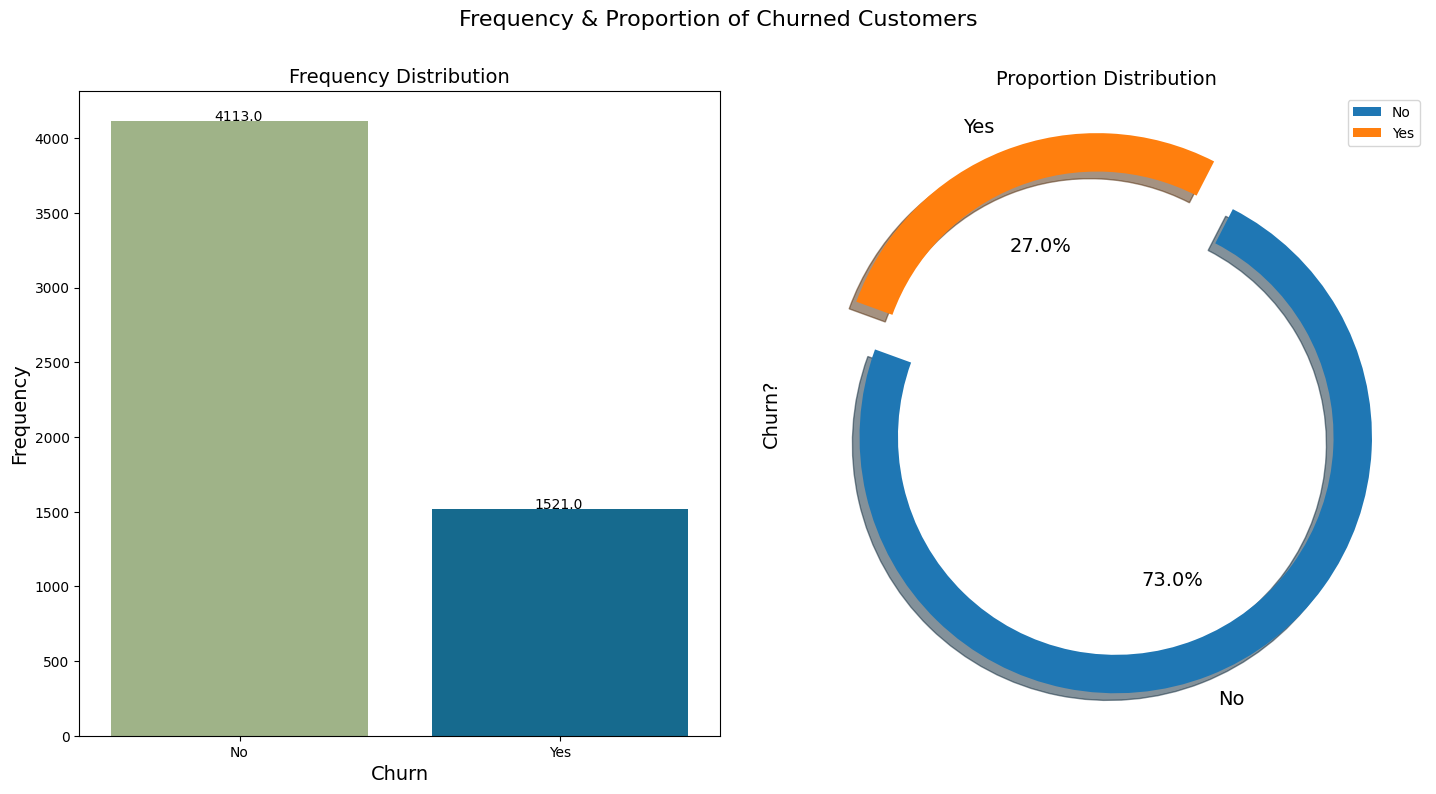

In [87]:
fig = plt.figure(figsize = [15, 8])
plt.subplot(1, 2, 1)
ax = sns.countplot(x = 'Churn', data = train, palette = ['#9FBA81', '#0272A2'])
for p in ax.patches:
  percentage = '{}'.format(p.get_height())
  x = p.get_x() + p.get_width() / 2.5
  y = p.get_y() + p.get_height() + 2
  ax.annotate(percentage, (x, y))
plt.xlabel(xlabel = 'Churn', size = 14)
plt.ylabel(ylabel = 'Frequency', size = 14)
plt.title(label = 'Frequency Distribution', size = 14)

plt.subplot(1, 2, 2)
space = np.ones(2)/10
train['Churn'].value_counts().plot(kind = 'pie', explode = space, fontsize = 14, autopct = '%3.1f%%', wedgeprops = dict(width=0.15), 
                                       shadow = True, startangle = 160, figsize = [15, 8], legend = True)
plt.ylabel(ylabel = 'Churn?', size = 14)
plt.title(label = 'Proportion Distribution', size = 14)
plt.tight_layout(pad = 3.0)
plt.suptitle(t = 'Frequency & Proportion of Churned Customers', y = 1.02, size = 16)
plt.show()

### Churn percentage is 27 which is quite high.

**<h4>Question 2: What is the frequency and proportion of gender?</h4>**

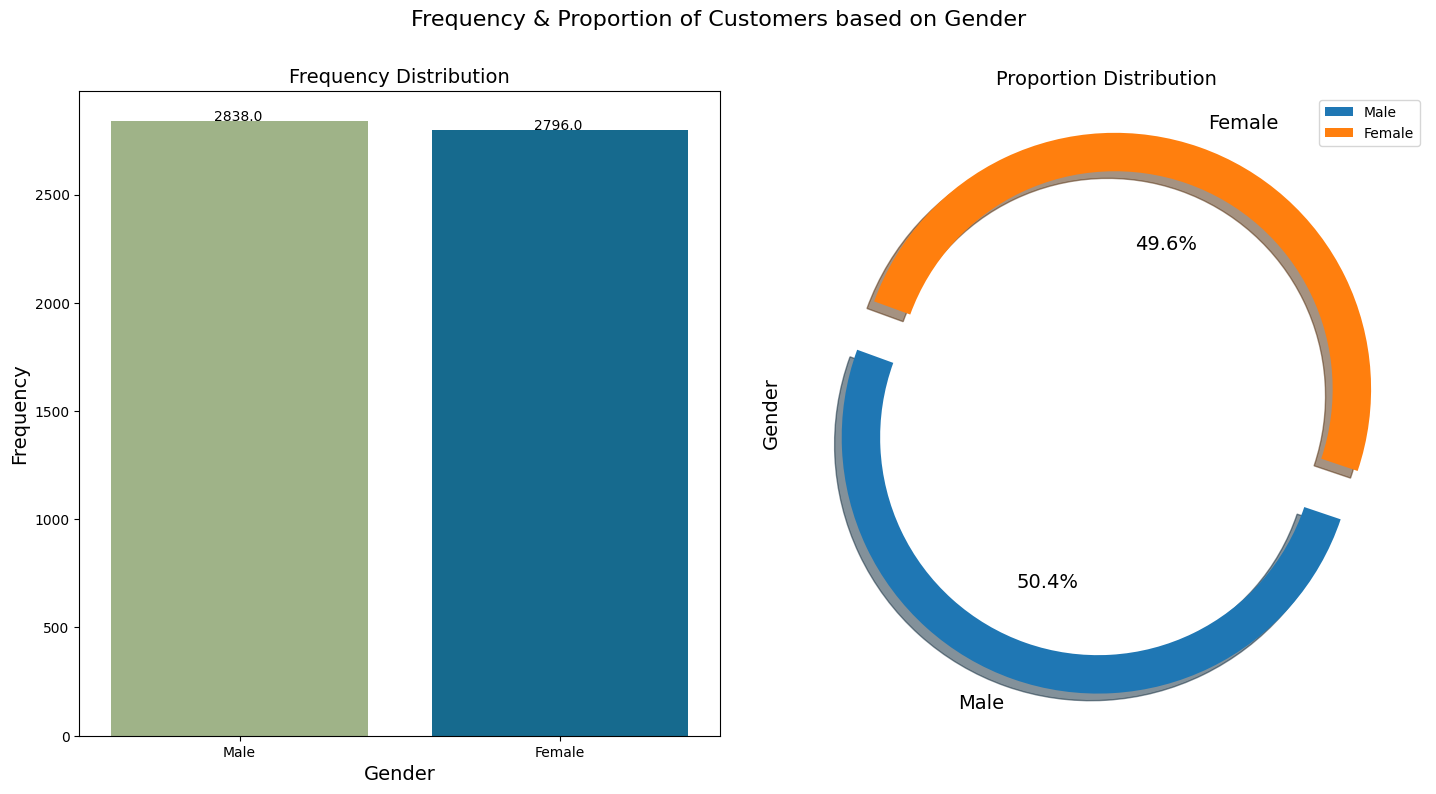

In [88]:
fig = plt.figure(figsize = [15, 8])
plt.subplot(1, 2, 1)
ax = sns.countplot(x = 'gender', data = train, palette = ['#9FBA81', '#0272A2'])
for p in ax.patches:
  percentage = '{}'.format(p.get_height())
  x = p.get_x() + p.get_width() / 2.5
  y = p.get_y() + p.get_height() + 2
  ax.annotate(percentage, (x, y))
plt.xlabel(xlabel = 'Gender', size = 14)
plt.ylabel(ylabel = 'Frequency', size = 14)
plt.title(label = 'Frequency Distribution', size = 14)

plt.subplot(1, 2, 2)
space = np.ones(2)/10
train['gender'].value_counts().plot(kind = 'pie', explode = space, fontsize = 14, autopct = '%3.1f%%', wedgeprops = dict(width=0.15), 
                                       shadow = True, startangle = 160, figsize = [15, 8], legend = True)
plt.ylabel(ylabel = 'Gender', size = 14)
plt.title(label = 'Proportion Distribution', size = 14)
plt.tight_layout(pad = 3.0)
plt.suptitle(t = 'Frequency & Proportion of Customers based on Gender', y = 1.02, size = 16)
plt.show()

**<h4>Question 3: What is the frequency distribution of gender with respect to Churn?</h4>**

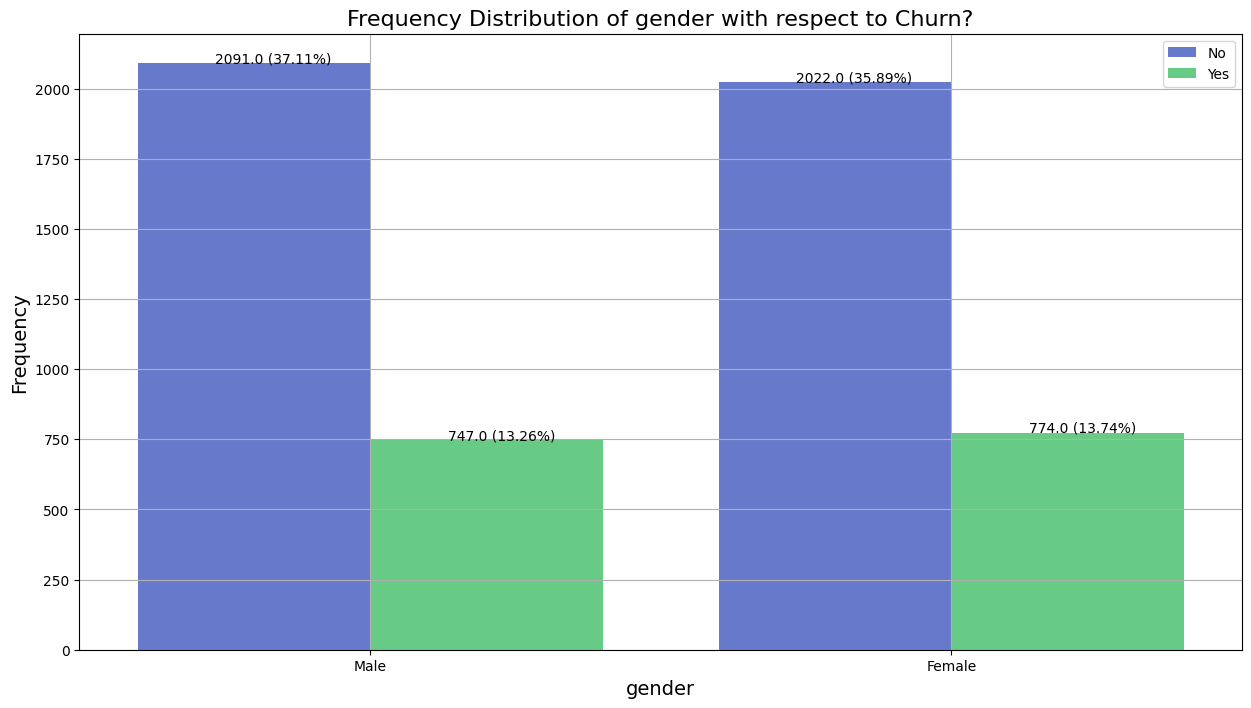

In [89]:
figure = plt.figure(figsize = [15, 8])
ax = sns.countplot(x = 'gender', hue = 'Churn', data = train, palette = ['#566FDB', '#56DB7F'])

total = train.shape[0]
for p in ax.patches:
  percentage = '{}'.format(p.get_height()) + ' (' +'{:.2f}%'.format(100*p.get_height()/total) + ')'
  x = p.get_x() + p.get_width() / 3
  y = p.get_y() + p.get_height() + 2
  ax.annotate(percentage, (x, y))

plt.xlabel(xlabel = 'gender', size = 14)
plt.ylabel(ylabel = 'Frequency', size = 14)
plt.title(label = 'Frequency Distribution of gender with respect to Churn?', size = 16)
plt.legend(loc = 'upper right')
plt.grid()
plt.show()

##### Gender has no infuence on churn, we can drop this feature later.

**<h4>Question 4: What is the frequency and proportion of internet service?</h4>**

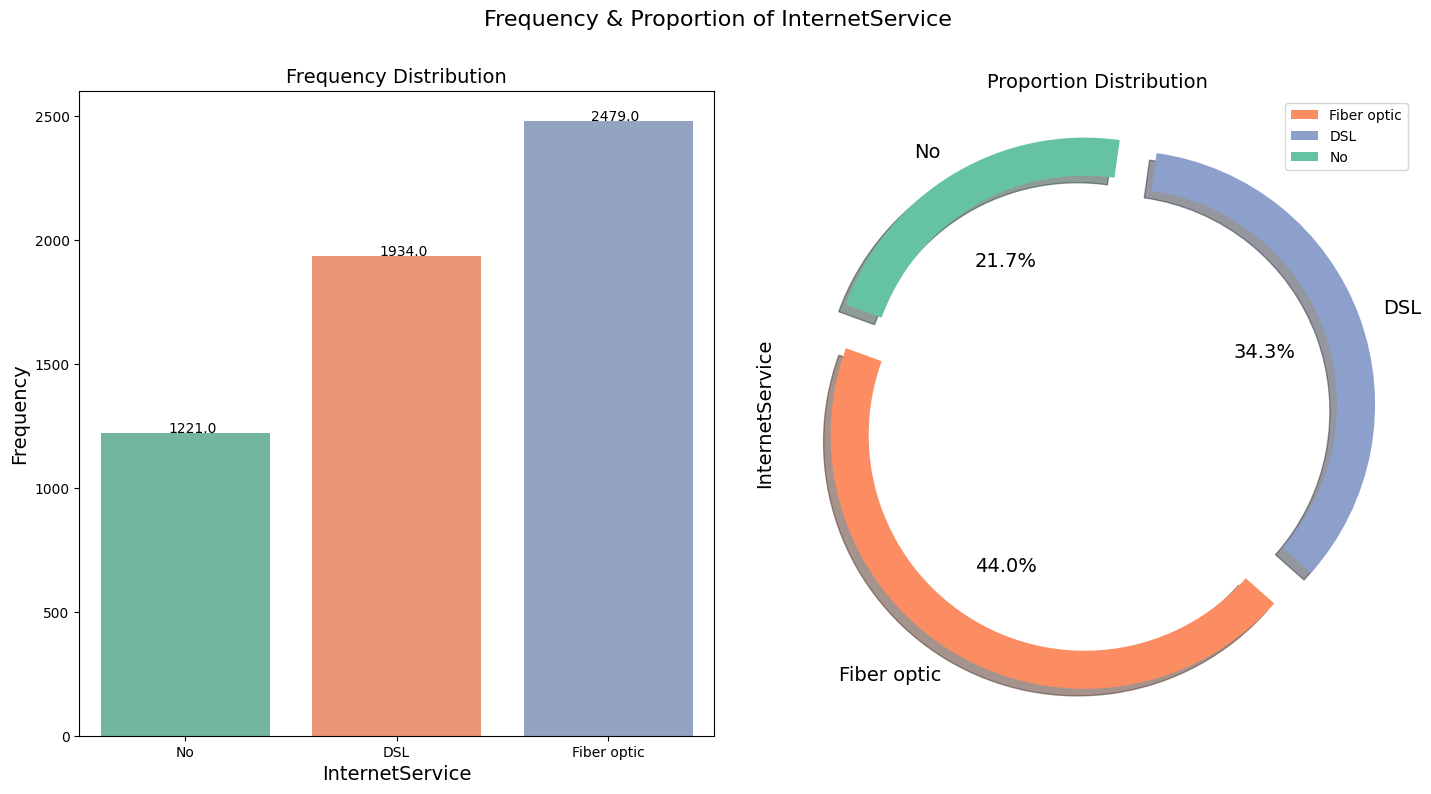

In [90]:
fig = plt.figure(figsize = [15, 8])
plt.subplot(1, 2, 1)
ax = sns.countplot(x = 'InternetService', data = train, palette = ['#66C2A5', '#FC8D62', '#8DA0CB'])
for p in ax.patches:
  percentage = '{}'.format(p.get_height())
  x = p.get_x() + p.get_width() / 2.5
  y = p.get_y() + p.get_height() + 2
  ax.annotate(percentage, (x, y))
plt.xlabel(xlabel = 'InternetService', size = 14)
plt.ylabel(ylabel = 'Frequency', size = 14)
plt.title(label = 'Frequency Distribution', size = 14)

plt.subplot(1, 2, 2)
space = np.ones(3)/10
train['InternetService'].value_counts().plot(kind = 'pie', explode = space, fontsize = 14, autopct = '%3.1f%%', wedgeprops = dict(width = 0.15), 
                                       shadow = True, startangle = 160, figsize = [15, 8], legend = True, colors = ['#FC8D62', '#8DA0CB', '#66C2A5'])
plt.ylabel(ylabel = 'InternetService', size = 14)
plt.title(label = 'Proportion Distribution', size = 14)
plt.tight_layout(pad = 3.0)
plt.suptitle(t = 'Frequency & Proportion of InternetService', y = 1.02, size = 16)
plt.show()

**<h4>Question 6: What is the frequency distribution of 'internet service' with respect to Churn?</h4>**

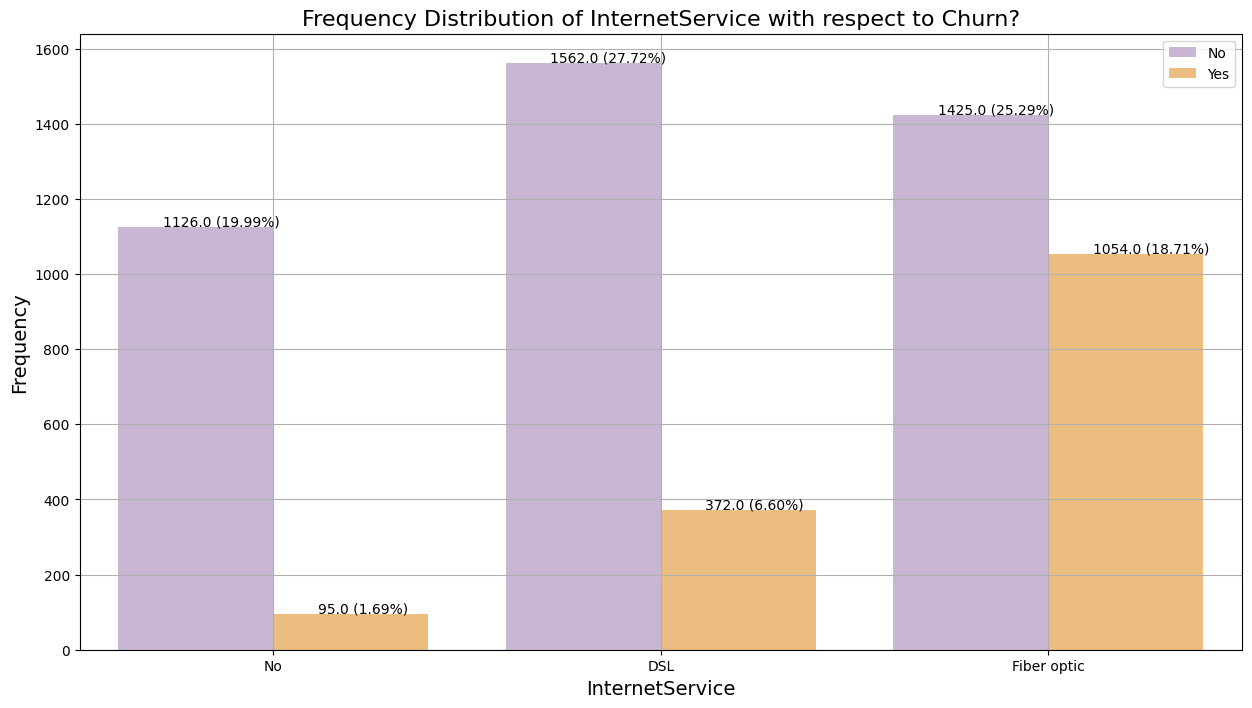

In [91]:
figure = plt.figure(figsize = [15, 8])
ax = sns.countplot(x = 'InternetService', hue = 'Churn', data = train, palette = ['#CAB2D6', '#FDBF6F'])

total = train.shape[0]
for p in ax.patches:
  percentage = '{}'.format(p.get_height()) + ' (' +'{:.2f}%'.format(100*p.get_height()/total) + ')'
  x = p.get_x() + p.get_width() / 3.5
  y = p.get_y() + p.get_height() + 2
  ax.annotate(percentage, (x, y))

plt.xlabel(xlabel = 'InternetService', size = 14)
plt.ylabel(ylabel = 'Frequency', size = 14)
plt.title(label = 'Frequency Distribution of InternetService with respect to Churn?', size = 16)
plt.legend(loc = 'upper right')
plt.grid()
plt.show()

- Customers with fibre optic as internet service shows maximum churn percentage.
- 18.71% churned customers are from fibre optics as internet service.
- Customers with no internet service shows very little (only 1.69%) churn percentage.
- Internet service is an important factor in predicting customer churn.

**<h4>Question 7: What is the relationship of some other features with respect to Churn?</h4>**

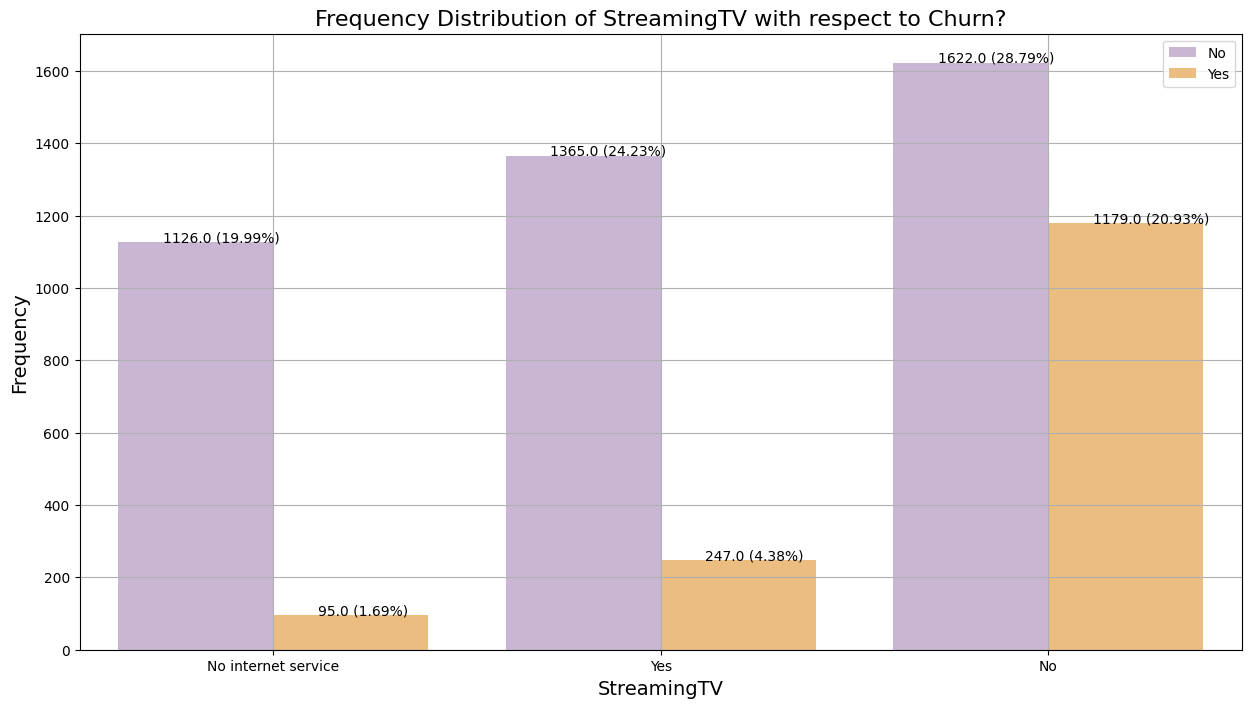

In [92]:
figure = plt.figure(figsize = [15, 8])
ax = sns.countplot(x = 'OnlineSecurity', hue = 'Churn', data = train, palette = ['#CAB2D6', '#FDBF6F'])

total = train.shape[0]
for p in ax.patches:
  percentage = '{}'.format(p.get_height()) + ' (' +'{:.2f}%'.format(100*p.get_height()/total) + ')'
  x = p.get_x() + p.get_width() / 3.5
  y = p.get_y() + p.get_height() + 2
  ax.annotate(percentage, (x, y))

plt.xlabel(xlabel = 'StreamingTV', size = 14)
plt.ylabel(ylabel = 'Frequency', size = 14)
plt.title(label = 'Frequency Distribution of StreamingTV with respect to Churn?', size = 16)
plt.legend(loc = 'upper right')
plt.grid()
plt.show()

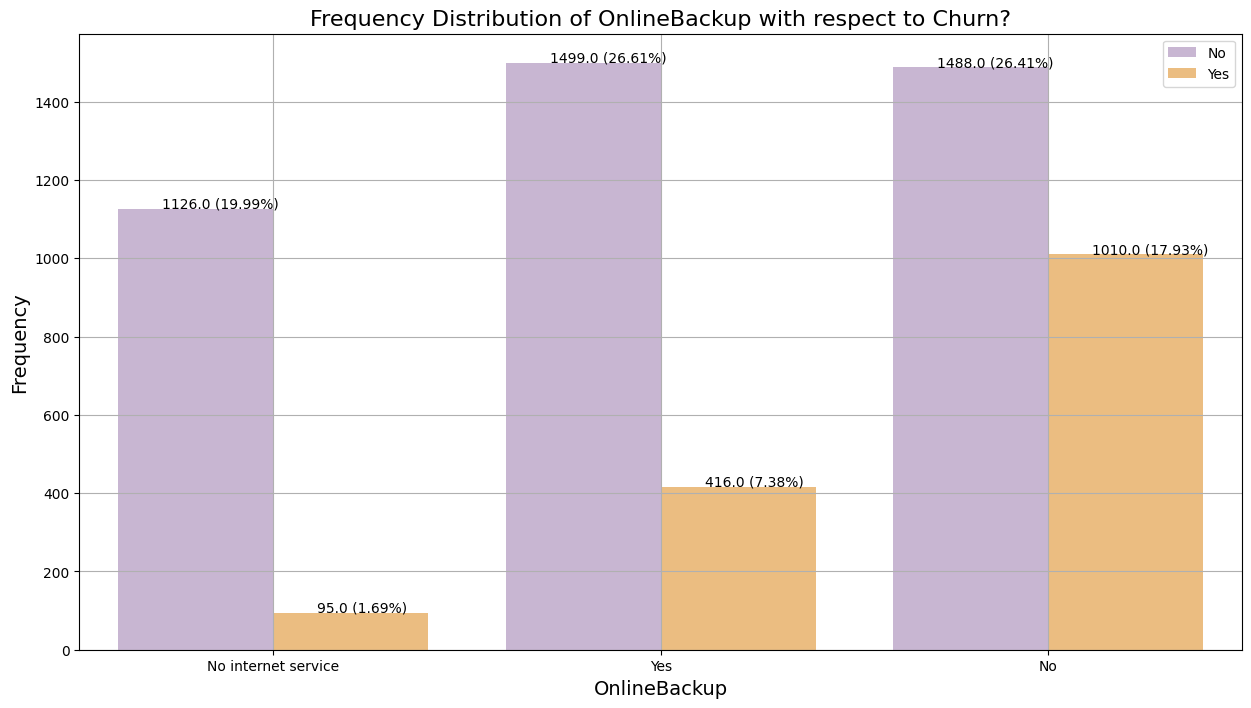

In [93]:
figure = plt.figure(figsize = [15, 8])
ax = sns.countplot(x = 'OnlineBackup', hue = 'Churn', data = train, palette = ['#CAB2D6', '#FDBF6F'])

total = train.shape[0]
for p in ax.patches:
  percentage = '{}'.format(p.get_height()) + ' (' +'{:.2f}%'.format(100*p.get_height()/total) + ')'
  x = p.get_x() + p.get_width() / 3.5
  y = p.get_y() + p.get_height() + 2
  ax.annotate(percentage, (x, y))

plt.xlabel(xlabel = 'OnlineBackup', size = 14)
plt.ylabel(ylabel = 'Frequency', size = 14)
plt.title(label = 'Frequency Distribution of OnlineBackup with respect to Churn?', size = 16)
plt.legend(loc = 'upper right')
plt.grid()
plt.show()

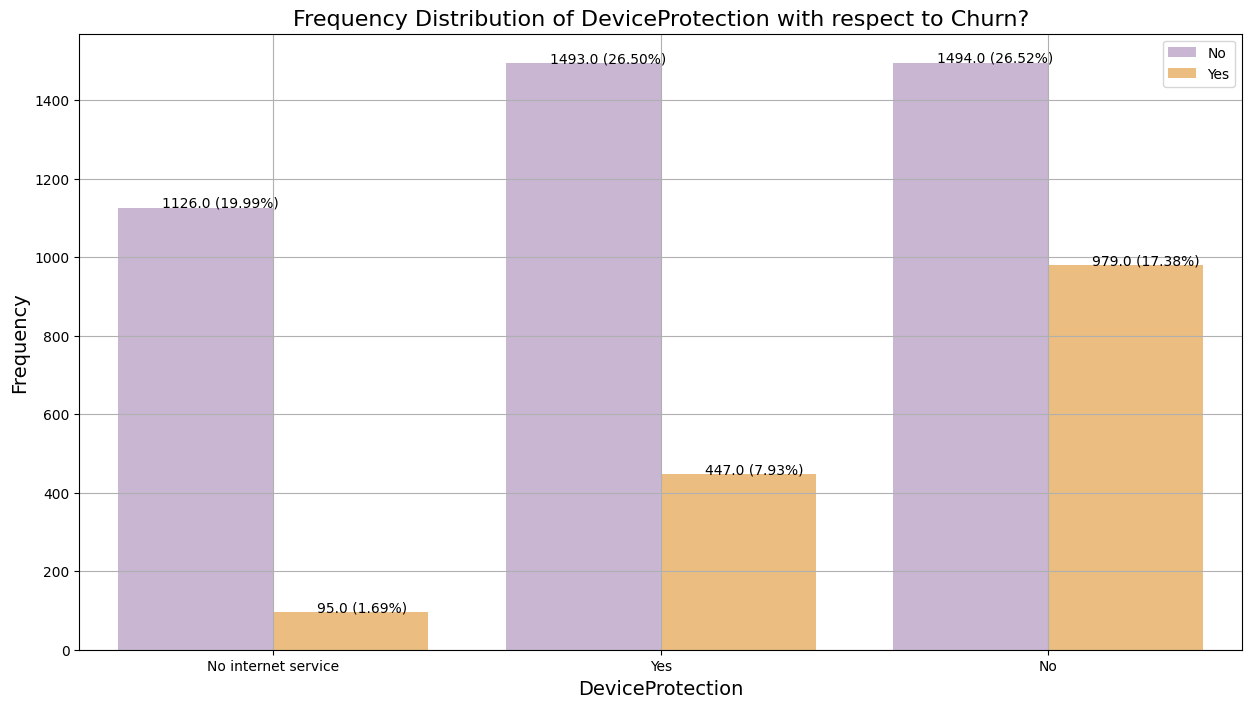

In [94]:
figure = plt.figure(figsize = [15, 8])
ax = sns.countplot(x = 'DeviceProtection', hue = 'Churn', data = train, palette = ['#CAB2D6', '#FDBF6F'])

total = train.shape[0]
for p in ax.patches:
  percentage = '{}'.format(p.get_height()) + ' (' +'{:.2f}%'.format(100*p.get_height()/total) + ')'
  x = p.get_x() + p.get_width() / 3.5
  y = p.get_y() + p.get_height() + 2
  ax.annotate(percentage, (x, y))

plt.xlabel(xlabel = 'DeviceProtection', size = 14)
plt.ylabel(ylabel = 'Frequency', size = 14)
plt.title(label = 'Frequency Distribution of DeviceProtection with respect to Churn?', size = 16)
plt.legend(loc = 'upper right')
plt.grid()
plt.show()

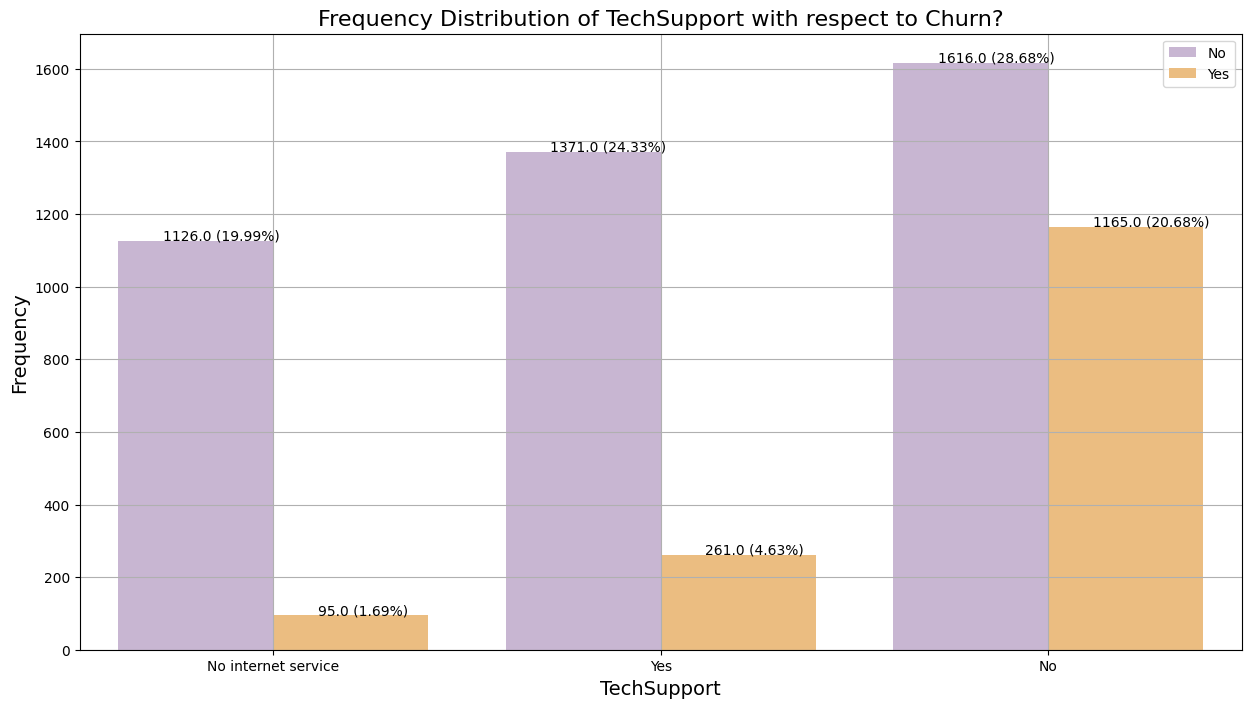

In [95]:
figure = plt.figure(figsize = [15, 8])
ax = sns.countplot(x = 'TechSupport', hue = 'Churn', data = train, palette = ['#CAB2D6', '#FDBF6F'])

total = train.shape[0]
for p in ax.patches:
  percentage = '{}'.format(p.get_height()) + ' (' +'{:.2f}%'.format(100*p.get_height()/total) + ')'
  x = p.get_x() + p.get_width() / 3.5
  y = p.get_y() + p.get_height() + 2
  ax.annotate(percentage, (x, y))

plt.xlabel(xlabel = 'TechSupport', size = 14)
plt.ylabel(ylabel = 'Frequency', size = 14)
plt.title(label = 'Frequency Distribution of TechSupport with respect to Churn?', size = 16)
plt.legend(loc = 'upper right')
plt.grid()
plt.show()

**<h4>Question 8: What is the frequecy distribution of 'contract'?</h4>**

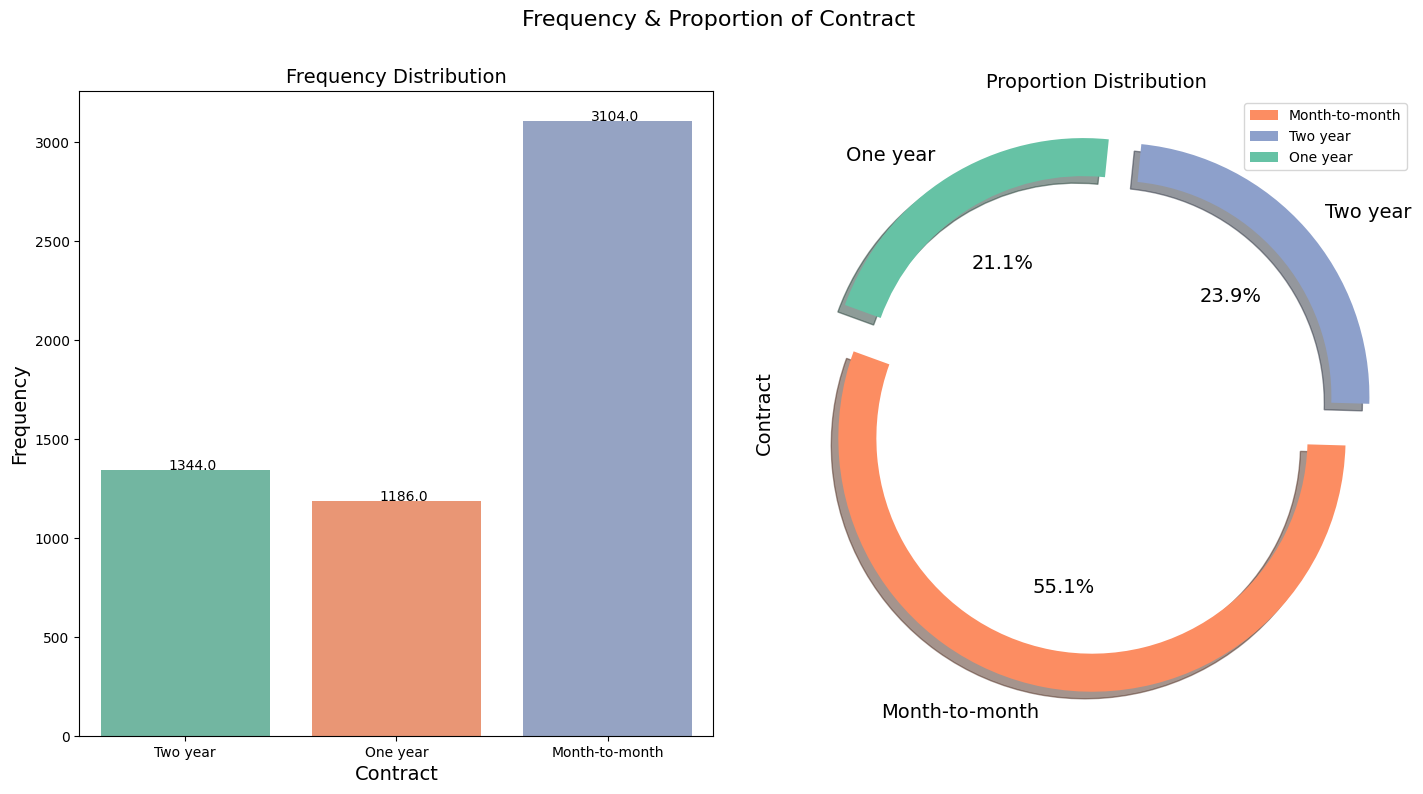

In [96]:
fig = plt.figure(figsize = [15, 8])
plt.subplot(1, 2, 1)
ax = sns.countplot(x = 'Contract', data = train, palette = ['#66C2A5', '#FC8D62', '#8DA0CB'])
for p in ax.patches:
  percentage = '{}'.format(p.get_height())
  x = p.get_x() + p.get_width() / 2.5
  y = p.get_y() + p.get_height() + 2
  ax.annotate(percentage, (x, y))
plt.xlabel(xlabel = 'Contract', size = 14)
plt.ylabel(ylabel = 'Frequency', size = 14)
plt.title(label = 'Frequency Distribution', size = 14)

plt.subplot(1, 2, 2)
space = np.ones(3)/10
train['Contract'].value_counts().plot(kind = 'pie', explode = space, fontsize = 14, autopct = '%3.1f%%', wedgeprops = dict(width = 0.15), 
                                       shadow = True, startangle = 160, figsize = [15, 8], legend = True, colors = ['#FC8D62', '#8DA0CB', '#66C2A5'])
plt.ylabel(ylabel = 'Contract', size = 14)
plt.title(label = 'Proportion Distribution', size = 14)
plt.tight_layout(pad = 3.0)
plt.suptitle(t = 'Frequency & Proportion of Contract', y = 1.02, size = 16)
plt.show()

**<h4>Question 9: What is the frequecy distribution of 'contract' with respect to Churn?</h4>**

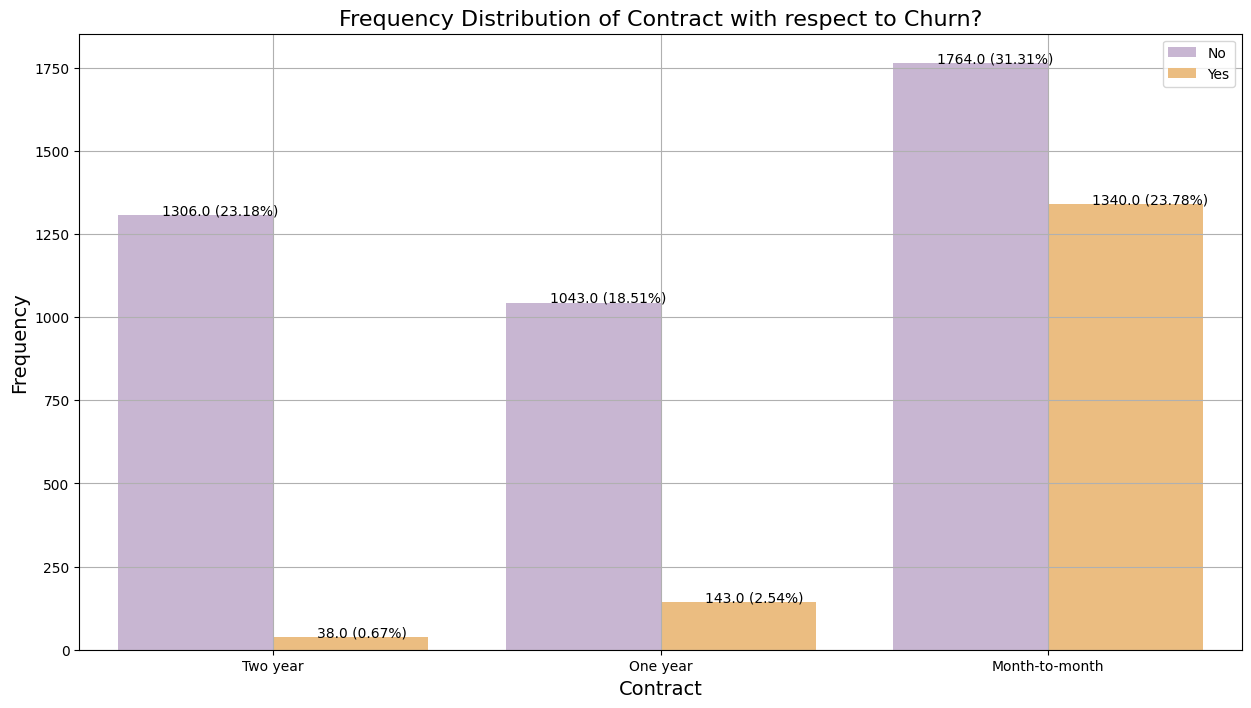

In [97]:
figure = plt.figure(figsize = [15, 8])
ax = sns.countplot(x = 'Contract', hue = 'Churn', data = train, palette = ['#CAB2D6', '#FDBF6F'])

total = train.shape[0]
for p in ax.patches:
  percentage = '{}'.format(p.get_height()) + ' (' +'{:.2f}%'.format(100*p.get_height()/total) + ')'
  x = p.get_x() + p.get_width() / 3.5
  y = p.get_y() + p.get_height() + 2
  ax.annotate(percentage, (x, y))

plt.xlabel(xlabel = 'Contract', size = 14)
plt.ylabel(ylabel = 'Frequency', size = 14)
plt.title(label = 'Frequency Distribution of Contract with respect to Churn?', size = 16)
plt.legend(loc = 'upper right')
plt.grid()
plt.show()

- Customers with month to month contract are more likely to churn.
- Customers with one year or two year contract shows very little churn percentage, around 3% only. 

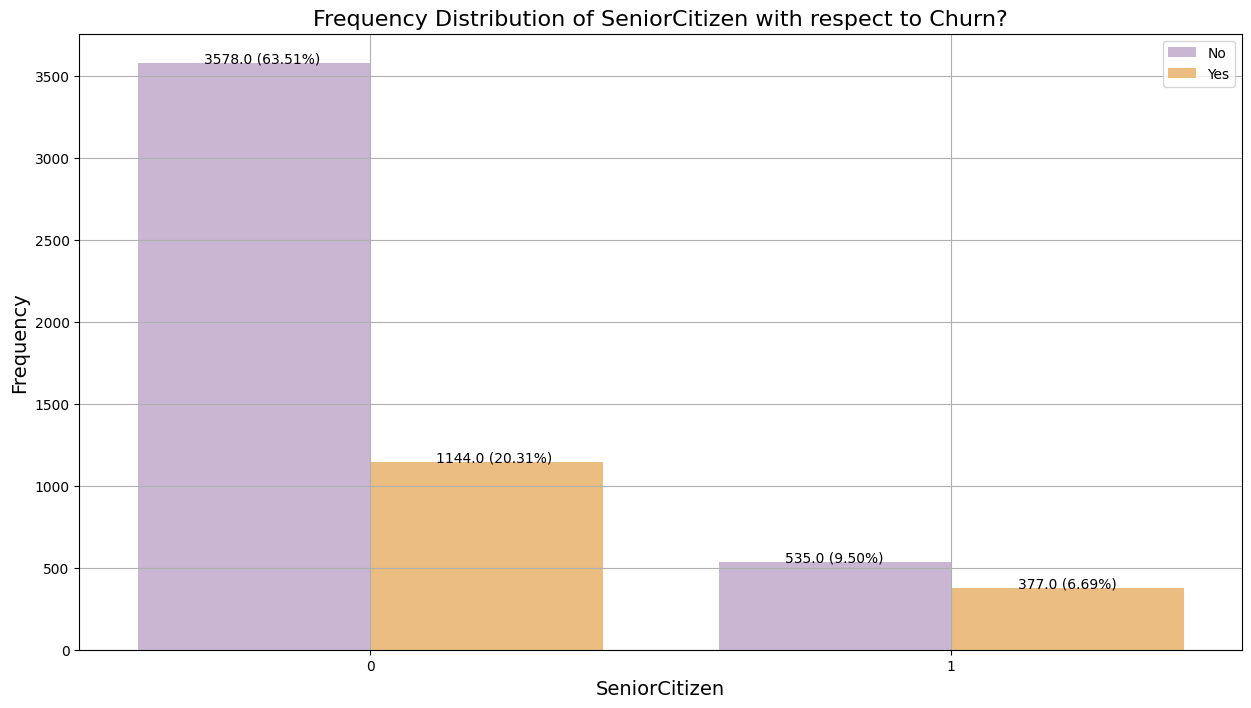

In [98]:
figure = plt.figure(figsize = [15, 8])
ax = sns.countplot(x = 'SeniorCitizen', hue = 'Churn', data = train, palette = ['#CAB2D6', '#FDBF6F'])

total = train.shape[0]
for p in ax.patches:
  percentage = '{}'.format(p.get_height()) + ' (' +'{:.2f}%'.format(100*p.get_height()/total) + ')'
  x = p.get_x() + p.get_width() / 3.5
  y = p.get_y() + p.get_height() + 2
  ax.annotate(percentage, (x, y))

plt.xlabel(xlabel = 'SeniorCitizen', size = 14)
plt.ylabel(ylabel = 'Frequency', size = 14)
plt.title(label = 'Frequency Distribution of SeniorCitizen with respect to Churn?', size = 16)
plt.legend(loc = 'upper right')
plt.grid()
plt.show()

#### With senior citizens churn probability high.

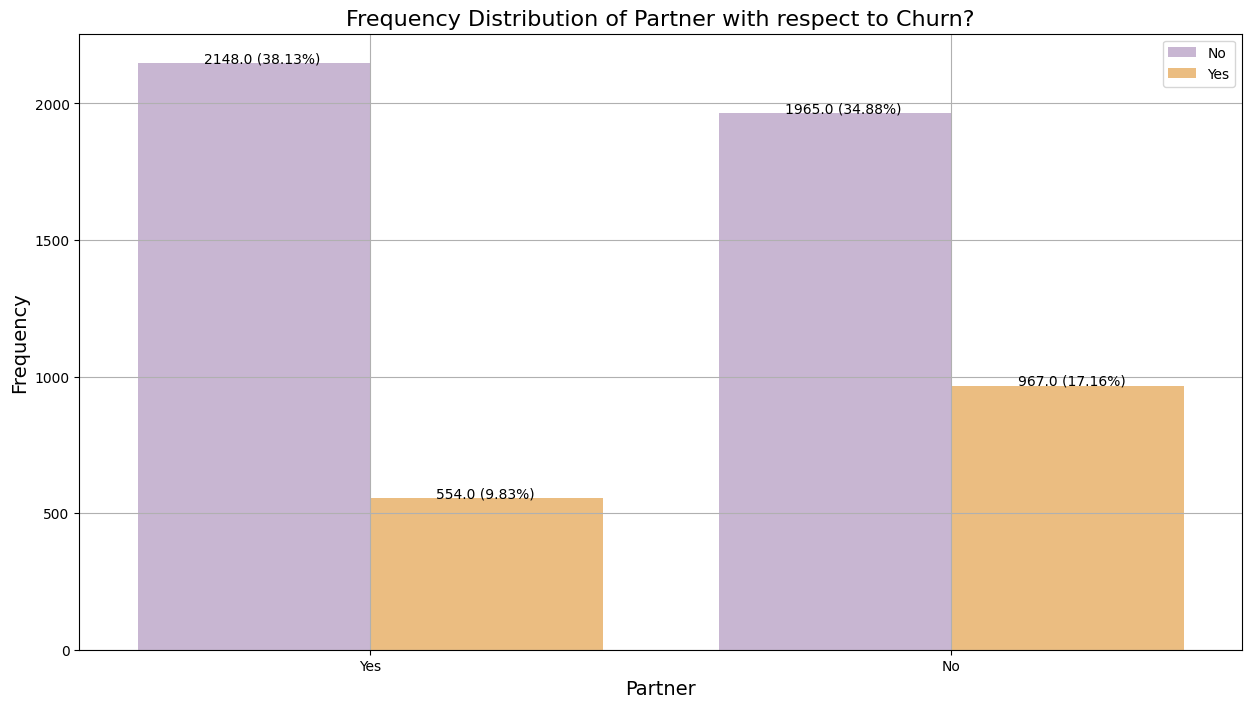

In [99]:
figure = plt.figure(figsize = [15, 8])
ax = sns.countplot(x = 'Partner', hue = 'Churn', data = train, palette = ['#CAB2D6', '#FDBF6F'])

total = train.shape[0]
for p in ax.patches:
  percentage = '{}'.format(p.get_height()) + ' (' +'{:.2f}%'.format(100*p.get_height()/total) + ')'
  x = p.get_x() + p.get_width() / 3.5
  y = p.get_y() + p.get_height() + 2
  ax.annotate(percentage, (x, y))

plt.xlabel(xlabel = 'Partner', size = 14)
plt.ylabel(ylabel = 'Frequency', size = 14)
plt.title(label = 'Frequency Distribution of Partner with respect to Churn?', size = 16)
plt.legend(loc = 'upper right')
plt.grid()
plt.show()

#### Customers with no partners are likely to churn more.

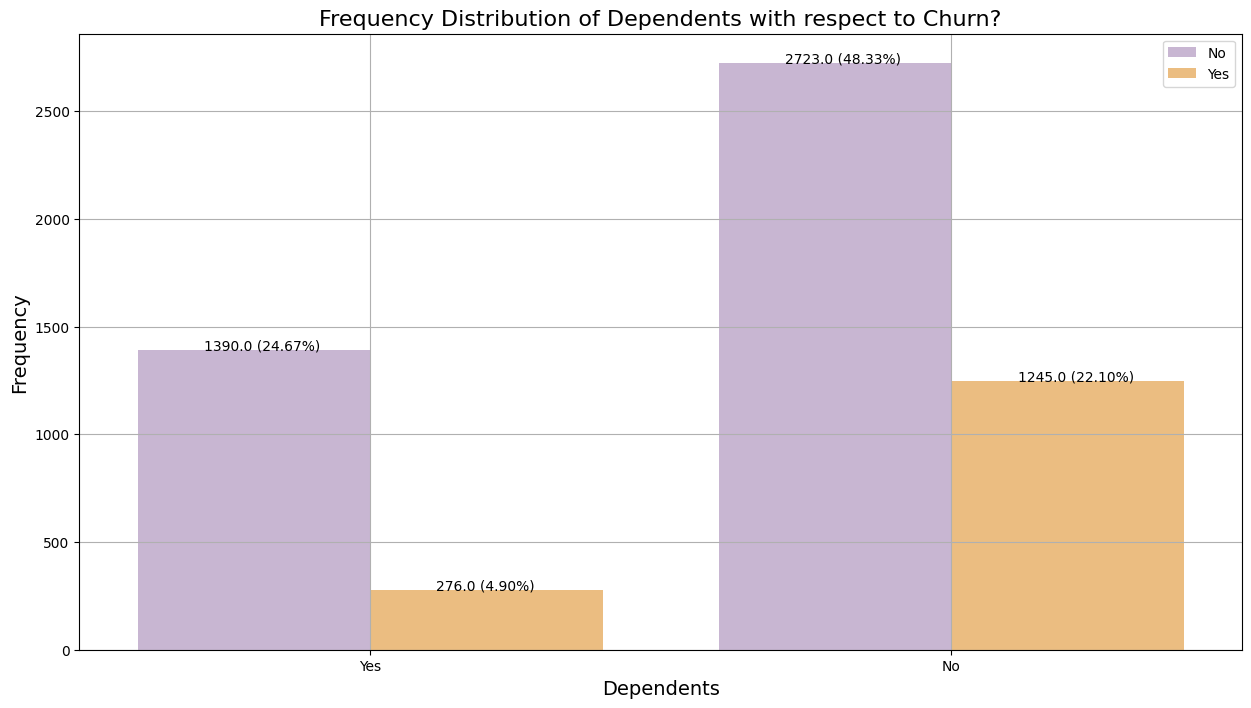

In [100]:
figure = plt.figure(figsize = [15, 8])
ax = sns.countplot(x = 'Dependents', hue = 'Churn', data = train, palette = ['#CAB2D6', '#FDBF6F'])

total = train.shape[0]
for p in ax.patches:
  percentage = '{}'.format(p.get_height()) + ' (' +'{:.2f}%'.format(100*p.get_height()/total) + ')'
  x = p.get_x() + p.get_width() / 3.5
  y = p.get_y() + p.get_height() + 2
  ax.annotate(percentage, (x, y))

plt.xlabel(xlabel = 'Dependents', size = 14)
plt.ylabel(ylabel = 'Frequency', size = 14)
plt.title(label = 'Frequency Distribution of Dependents with respect to Churn?', size = 16)
plt.legend(loc = 'upper right')
plt.grid()
plt.show()

#### Customers with no dependents are likely to churn more.

# Feature Engineering

In [101]:
train['tenure_year'] = train['tenure'].apply(lambda x: x//12 if x%12 == 0 else (x//12 + 1))

In [102]:
train['tenure_year'].value_counts()

1    1753
6    1125
2     812
3     656
5     646
4     634
0       8
Name: tenure_year, dtype: int64

In [103]:
train.drop('tenure', axis = 1, inplace = True)

In [104]:
test['tenure_year'] = test['tenure'].apply(lambda x: x//12 if x%12 == 0 else (x//12 + 1))

In [105]:
test['tenure_year'].value_counts()

1    422
6    282
2    212
5    186
3    176
4    128
0      3
Name: tenure_year, dtype: int64

In [106]:
test.drop('tenure', axis = 1, inplace = True)

### Let see how churn is affected with tenure

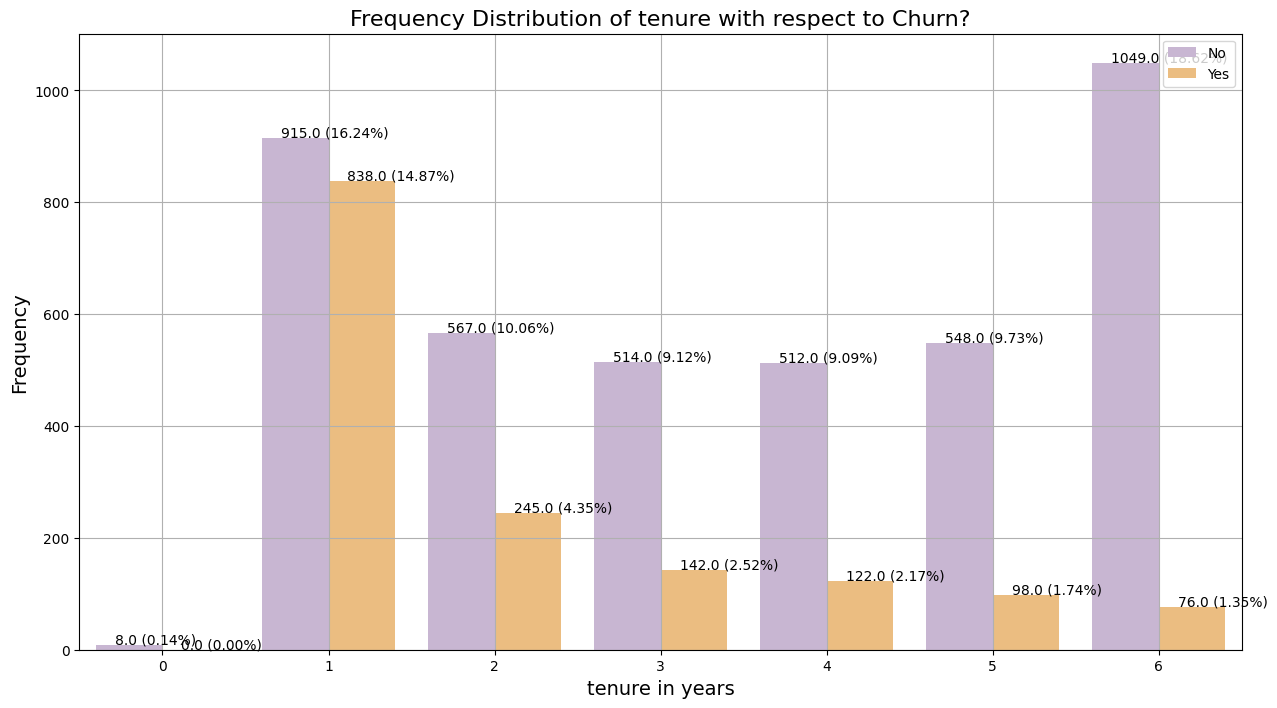

In [107]:
figure = plt.figure(figsize = [15, 8])
ax = sns.countplot(x = 'tenure_year', hue = 'Churn', data = train, palette = ['#CAB2D6', '#FDBF6F'])

total = train.shape[0]
for p in ax.patches:
  percentage = '{}'.format(p.get_height()) + ' (' +'{:.2f}%'.format(100*p.get_height()/total) + ')'
  x = p.get_x() + p.get_width() / 3.5
  y = p.get_y() + p.get_height() + 2
  ax.annotate(percentage, (x, y))

plt.xlabel(xlabel = 'tenure in years', size = 14)
plt.ylabel(ylabel = 'Frequency', size = 14)
plt.title(label = 'Frequency Distribution of tenure with respect to Churn?', size = 16)
plt.legend(loc = 'upper right')
plt.grid()
plt.show()

#### Churn percentage is very high during first and second year.
#### As the number of years increses churn frequency resduces remarkably.

## Let us drop the columns 'customerID', 'gender', 'TotalCharges' before model evaluation 

In [108]:
train.drop(['customerID', 'gender', 'TotalCharges'], axis = 1, inplace = True)

# Encoding the categorical variables for model evaluation

In [109]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in train.columns:
  if train[i].dtype=='object':
    train[i] = le.fit_transform(train[i])

In [110]:
train.head()

,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn,tenure_year
0,0,1,1,1,0,2,1,1,1,1,1,1,2,0,3,19.70000,0,1
1,0,0,0,1,0,0,2,2,2,2,0,2,1,0,1,73.90000,1,4
2,0,1,0,1,2,0,2,2,0,2,0,0,2,0,0,65.15000,0,6
3,0,1,1,1,2,0,2,0,2,2,2,2,1,0,2,85.45000,0,6
4,0,0,0,1,0,0,2,2,0,2,2,0,1,0,2,70.40000,0,3


# Scaling the variables

In [111]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(train.drop('Churn', axis=1))
X_scaled_frame = pd.DataFrame(data=X_scaled, columns=train.drop('Churn', axis=1).columns)
y = train['Churn']

In [112]:
X_scaled_frame.head()

,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,tenure_year
0,0.00000,1.00000,1.00000,1.00000,0.00000,1.00000,0.50000,0.50000,0.50000,0.50000,0.50000,0.50000,1.00000,0.00000,1.00000,0.01444,0.16667
1,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000,1.00000,1.00000,1.00000,0.00000,1.00000,0.50000,0.00000,0.33333,0.55428,0.66667
2,0.00000,1.00000,0.00000,1.00000,1.00000,0.00000,1.00000,1.00000,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.46713,1.00000
3,0.00000,1.00000,1.00000,1.00000,1.00000,0.00000,1.00000,0.00000,1.00000,1.00000,1.00000,1.00000,0.50000,0.00000,0.66667,0.66932,1.00000
4,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000,1.00000,0.00000,1.00000,1.00000,0.00000,0.50000,0.00000,0.66667,0.51942,0.50000


In [113]:
y.head()

0    0
1    1
2    0
3    0
4    0
Name: Churn, dtype: int64

# Train test split

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled_frame, y, test_size=0.2, random_state=42, stratify=y)

print('Training Data Shape:', X_train.shape, y_train.shape)
print('Testing Data Shape:', X_test.shape, y_test.shape)

Training Data Shape: (4507, 17) (4507,)
Testing Data Shape: (1127, 17) (1127,)


<a name = Section8></a>

---
# **8. Model Development & Evaluation**
---

- In this section we will **develop Logistic Regression using input features** and **tune** our **model if required**.

- Then we will **analyze the results** obtained and **make our observation**.

- For **evaluation purpose** we will **focus** on **Accuracy**.



## Logistic Regression - Baseline Model

In [115]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

#predicting on train data
y_pred_train = logreg.predict(X_train)

#predicting on test data
y_pred_test = logreg.predict(X_test)

## **8.3 Logistic Regression Model Evaluation**

### Checking Accuracy

In [116]:
print('Accuracy score for train data is:', accuracy_score(y_train,y_pred_train))
print('Accuracy score for test data is:', accuracy_score(y_test,y_pred_test))

Accuracy score for train data is: 0.7949855779897936
Accuracy score for test data is: 0.7985803016858918


## Application on Test Data

In [117]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1409 entries, 0 to 1408
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        1409 non-null   object 
 1   gender            1409 non-null   object 
 2   SeniorCitizen     1409 non-null   int64  
 3   Partner           1409 non-null   object 
 4   Dependents        1409 non-null   object 
 5   PhoneService      1409 non-null   object 
 6   MultipleLines     1409 non-null   object 
 7   InternetService   1409 non-null   object 
 8   OnlineSecurity    1409 non-null   object 
 9   OnlineBackup      1409 non-null   object 
 10  DeviceProtection  1409 non-null   object 
 11  TechSupport       1409 non-null   object 
 12  StreamingTV       1409 non-null   object 
 13  StreamingMovies   1409 non-null   object 
 14  Contract          1409 non-null   object 
 15  PaperlessBilling  1409 non-null   object 
 16  PaymentMethod     1409 non-null   object 


In [118]:
test.isnull().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
tenure_year         False
dtype: bool

In [119]:
test_copy = test.drop(['customerID', 'gender', 'TotalCharges'], axis = 1)

In [120]:
le = LabelEncoder()
for i in test_copy.columns:
  if test_copy[i].dtype=='object':
    test_copy[i] = le.fit_transform(test_copy[i])

In [121]:
test.shape

(1409, 20)

In [123]:
churn_test = logreg.predict(test_copy)

In [124]:
churn_test

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
y = ['Churn']
df2 = pd.DataFrame(data = churn_test, columns = y)

df2['Churn'].replace(to_replace=1, value='Yes', inplace=True)
df2['Churn'].replace(to_replace=0,  value='No', inplace=True)
df2

In [ ]:
df1 = test['customerID']
df1

In [138]:
sub_df = df2.join(test['customerID'])

In [139]:
sub_df.head()

,Churn,customerID
0,Yes,8879-ZKJOF
1,Yes,0201-MIBOL
2,Yes,1600-DILPE
3,Yes,8601-QACRS
4,Yes,7919-ZODZZ


In [140]:
sub_df.to_csv('submission.csv', index=False, header=False)